In [415]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from configparser import ConfigParser
import numpy as np


In [416]:
tests = [
    'FedPOC 2', # This
    'FedAVG 2', # This
    'FedPOC 4', # This
    'FedAVG 4', # This
    'FedPOC 5', # This
    'FedAVG 6', # This
]

In [417]:
#round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,l_fit_acc,l_fit_loss,dynamic_engagement,old_dynamic_engagement,is_selected,desire,size,cost,willing,r_intention,miss,epoch,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
# fig, ax = plt.subplots(figsize=(7,5))
client_data = pd.read_csv('logs/c-data.csv')
client_data.tail()
# sns.lineplot(ax=ax, x='rounds', y='g_eval_acc', data=client_data, errorbar=('ci', False), hue=)


,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients
3595,25,11,avg,default,dnn,0.523409,3.848423,0.384154,25.602316,0.975410,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3596,25,8,avg,default,dnn,0.780312,0.811755,0.433373,50.328331,0.969785,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3597,25,7,avg,default,dnn,0.785114,0.718619,0.528211,13.890777,0.968069,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3598,25,6,avg,default,dnn,0.773109,0.776871,0.300120,109.830894,0.978227,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75
3599,25,2,avg,default,dnn,0.764988,0.881813,0.275779,40.362026,0.970564,...,1,0.1,True,mnist,0.0,0.5,0.0,0.005,1.0,0.75


In [418]:

# Lendo o arquivo de configuração
def read_config(filename, section):
    config = ConfigParser()
    config.read(filename)
    if section in config:
        return config[section]
    else:
        raise ValueError(f"Section '{section}' not found in the configuration file.")

def filter_dataframe(df:pd.DataFrame, config):
    # Construindo a expressão de filtro com base na configuração
    filter_expressions = []
    for key, value in config.items():
        if key in df.columns:
            column_type = type(df[key].dtypes)
            if key == 'rounds':
                continue
            if column_type == np.dtypes.BoolDType:
                typed_value = str(value.lower() in ['true', 'yes', '1'])
            elif column_type in [np.dtypes.Int64DType, np.dtypes.Float64DType]:
                typed_value = value
            else:
                typed_value = f"'{value.lower()}'"  # Adiciona aspas para garantir que seja tratado como string
            if key == 'strategy':
                filter_expressions.append(f"(client_data['{key}'] == {typed_value})")
            else:
                filter_expressions.append(f"(client_data['{key}'] == {typed_value})")
    filter_expression = " & ".join(filter_expressions)
    # print(filter_expression)
    filtered_df = df.loc[eval(filter_expression)]
    return filtered_df


In [419]:
config = read_config('config-debug.ini', tests[0])
filter_dataframe(client_data, config)

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients
2400,1,10,poc,default,dnn,0.250900,17.704563,0.471789,16.412817,0.913795,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2401,1,9,poc,default,dnn,0.247299,17.647823,0.438175,23.491028,0.749559,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2402,1,8,poc,default,dnn,0.256903,16.468760,0.376951,46.927616,0.873001,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2403,1,6,poc,default,dnn,0.279712,16.021099,0.210084,67.629837,0.842924,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2404,1,4,poc,default,dnn,0.238896,16.984871,0.280912,71.670746,0.886688,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,25,3,poc,default,dnn,0.556355,20.950436,0.526379,27.415562,0.999513,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2696,25,9,poc,default,dnn,0.521008,8.231536,0.476591,22.036270,1.000000,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2697,25,1,poc,default,dnn,0.450839,4.485106,0.260192,79.935646,0.950166,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75
2698,25,6,poc,default,dnn,0.498199,3.474280,0.284514,78.542030,0.139969,...,1,0.1,True,mnist,0.0,0.25,0.0,0.005,1.0,0.75


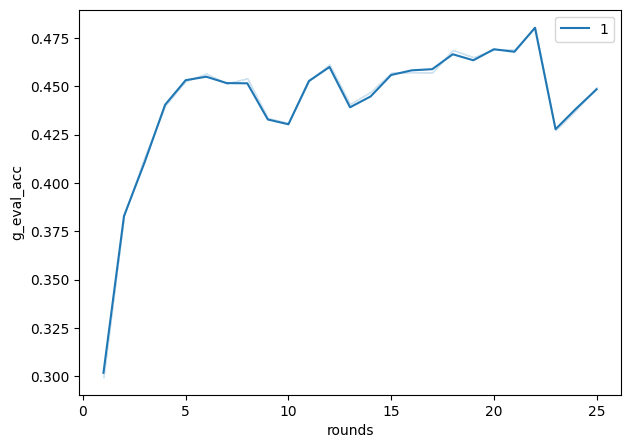

In [420]:
fig, ax = plt.subplots(figsize=(7,5))
config = read_config('config-debug.ini', tests[0])
filtered_data = filter_dataframe(client_data, config)
# print(filtered_data)
sns.lineplot(ax=ax, x='rounds', y='g_eval_acc', data=filtered_data, label=f'1', errorbar=('ci', False))
ax.legend()

In [421]:
da = {'a':1}
len(da.values())

1

(300, 32)
(300, 32)


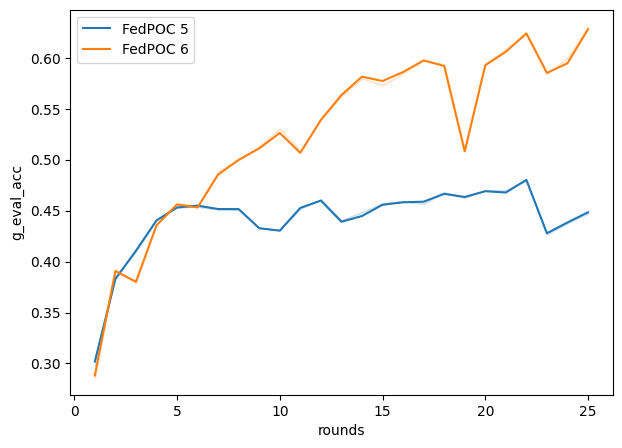

In [422]:
fig, ax = plt.subplots(figsize=(7,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    filtered_data = filter_dataframe(client_data, config)
    print(filtered_data.shape)
    if 'poc' in t.lower():
        sol = 'poc'
    elif 'deev' in t.lower():
        sol = 'deev'
    elif 'avg' in t.lower():
        sol = 'avg'
    else:
        sol = 'cia'
    sns.lineplot(ax=ax, x='rounds', y='g_eval_acc', data=filtered_data, label=f'{config.name}', errorbar=('ci', False))
# ax.legend(bbox_to_anchor=(1, 1), ncol=10)
ax.legend()

In [423]:
# tests[1]

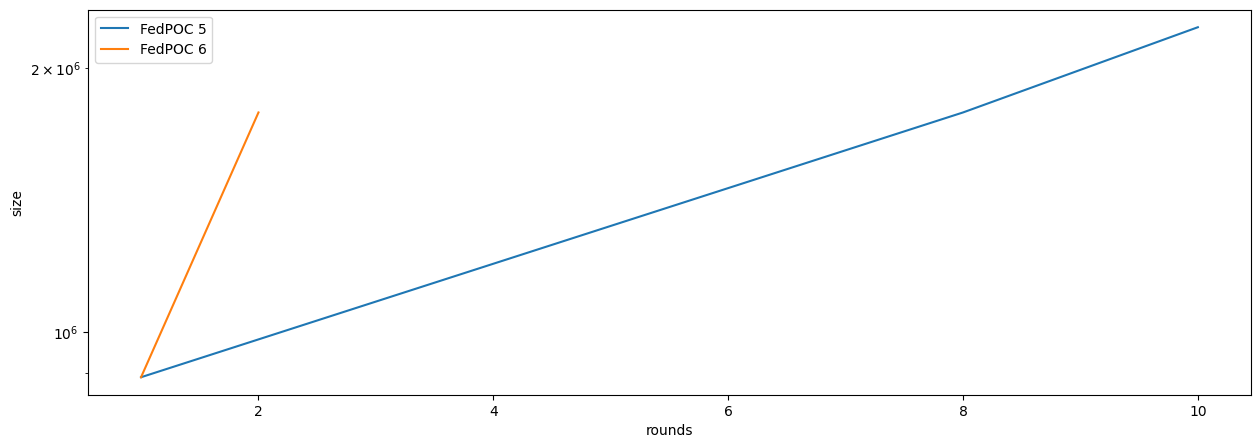

In [424]:
fig, ax = plt.subplots(figsize=(15,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    filtered_data = filter_dataframe(client_data, config)
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
    if 'poc' in t.lower():
        sol = 'poc'
    elif 'deev' in t.lower():
        sol = 'deev'
    elif 'avg' in t.lower():
        sol = 'avg'
    else:
        sol = 'cia'
    # print(filtered_data.shape)
    if filtered_data.shape[0] > 0:
        sns.lineplot(ax=ax, x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{config.name}', errorbar=('ci', False))
# ax.legend(bbox_to_anchor=(0.5, 1.5), ncol=10)
ax.legend()
ax.set_yscale('log')

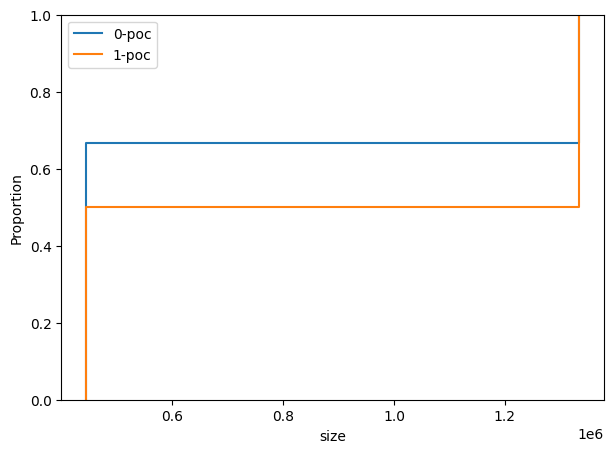

In [425]:
fig, ax = plt.subplots(figsize=(7,5))
for i, t in enumerate(tests):
    if 'poc' in t.lower():
        sol = 'poc'
    elif 'deev' in t.lower():
        sol = 'deev'
    elif 'avg' in t.lower():
        sol = 'avg'
    else:
        sol = 'cia'
    config = read_config('config-debug.ini', t)
    filtered_data = filter_dataframe(client_data, config)
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True) & (filtered_data['old_dynamic_engagement'] == False)]
    filtered_data = filtered_data.groupby('rounds').count() * 444584
    # print(filtered_data)
    # if filtered_data.shape[0] > 0:
    sns.ecdfplot(ax=ax, x='size', data=filtered_data, label=f'{i}-{sol}')
ax.legend()